In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [11]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [12]:
X, y = boston['data'], boston['target']
N, K = X.shape[0], X.shape[1]

train_ind = np.random.choice(np.arange(N), int(N * .7), replace = False)
test_ind = np.array([x for x in np.arange(N) if x not in set(train_ind)])

Xtrain, ytrain = X[train_ind], y[train_ind]
Xtest, ytest = X[test_ind], y[test_ind]

In [13]:
model = Sequential()
model.add(Dense(26, input_shape = (K,)))
model.add(LeakyReLU())
model.add(Dense(52))
model.add(Dense(1))

In [14]:
model.compile(optimizer = keras.optimizers.adam(),
              loss = keras.losses.mean_squared_logarithmic_error,
              metrics = [keras.metrics.mape])

In [15]:
history = model.fit(Xtrain, ytrain, validation_data = (Xtest, ytest), epochs = 5000, verbose = 0)

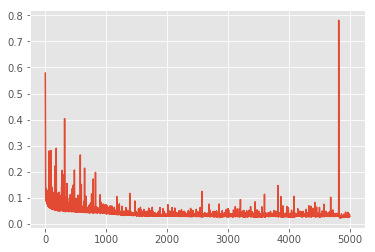

In [16]:
plt.plot(history.history["val_loss"])

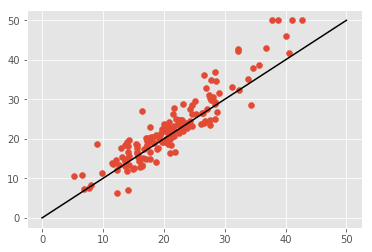

In [17]:
plt.scatter(model.predict(Xtest), ytest.reshape(-1,1))
plt.plot(*[[0,50]]*2, color = "black")